---
<center>

**Technological Institute of the Philippines**<br>
Computer Engineering Department<br>
Quezon city Campus</center>

---

<center> Midterm Skills Exam: Data Wrangling and Analysis <center>

---
<center>

| Course: CPE 311 | Program: BSCpE |
|--- | --- |
| **Course Title**: Computational Thinking with Python | **Date Performed:** April 13 , 2024 |
| **Section:** BSCPE22S3 | **Date Submitted:** April 13, 2024 |
| **Student Name**: Juliann Vincent B. Quibral | **Instructor's Name:** Engr. Roman Richard |


</center>

# **Data Import**

In [3]:
pip install ucimlrepo

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [5]:
census_income = fetch_ucirepo(id=20)

In [6]:
X = census_income.data.features
y = census_income.data.targets

# **Initial Exploration**

In [7]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [8]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


# **Data Concatenation**

In [9]:
df = pd.concat([X, pd.DataFrame(y, columns=['income'])], axis=1)

In [10]:
print("Data Imported. Shape of DataFrame:", df.shape)

Data Imported. Shape of DataFrame: (48842, 15)


In [11]:
# Save DataFrame to CSV file
df.to_csv('Census.csv', index=False)

In [12]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


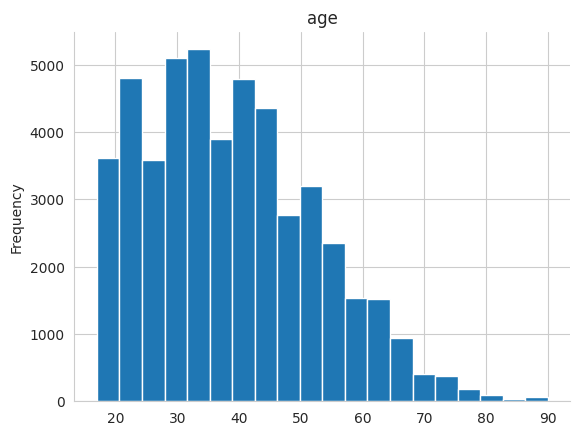

In [ ]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

Summary of the repondents age.

# **Check or missing values**

In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [14]:
# Fill missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

In [15]:
#Recheck for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


# **Check for duplicate values**

In [16]:
# Checking for duplicate values
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)


Number of Duplicate Rows: 29


In [17]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [18]:
#Rechecking for duplicate values
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)


Number of Duplicate Rows: 0


# **Initial Plot**

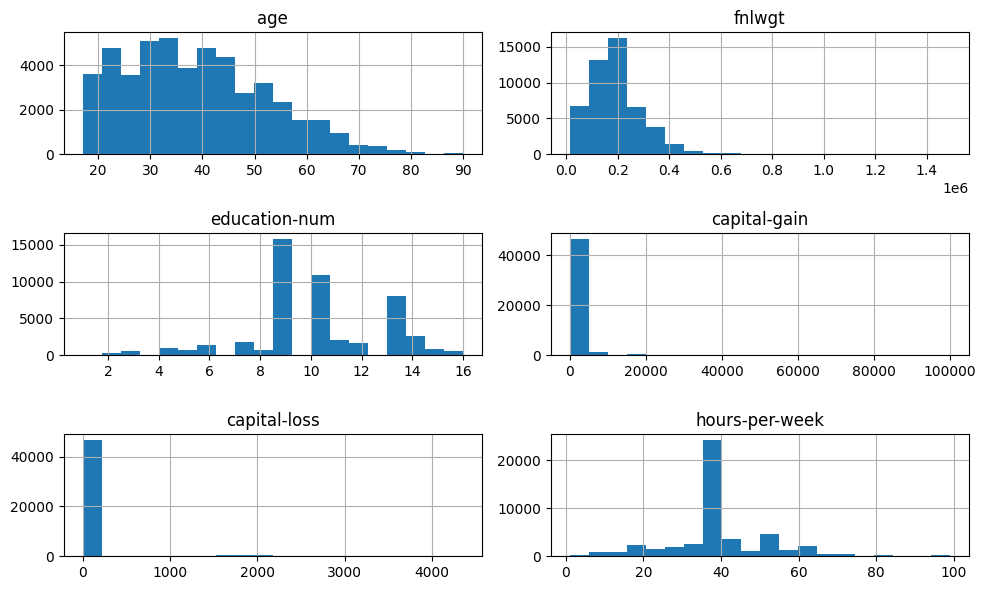

In [19]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# **Correlation Matrix**

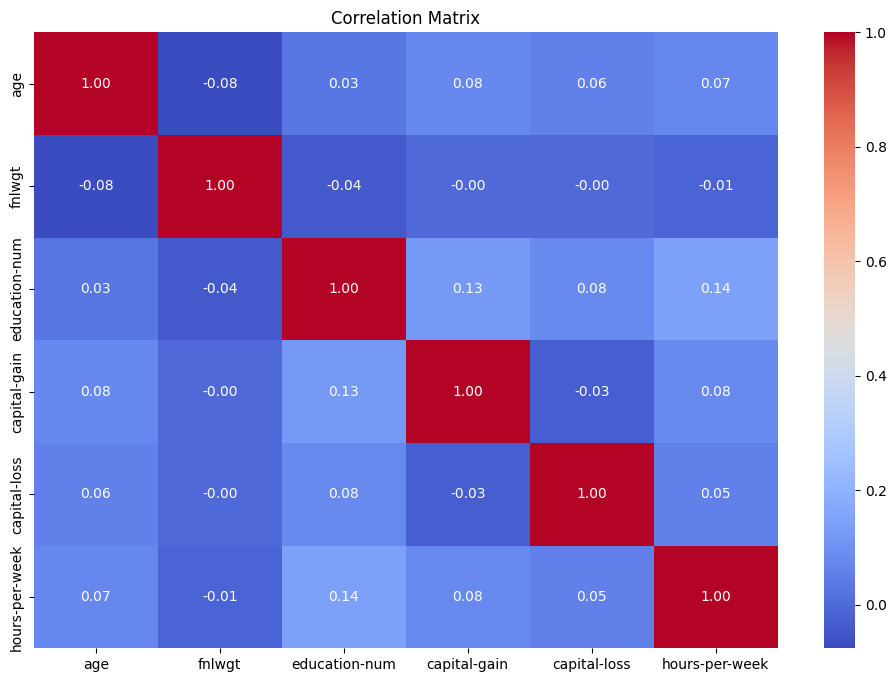

In [20]:
# Correlation matrix (excluding non-numeric columns)
correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **Data Correlation/Comparions Plotting**

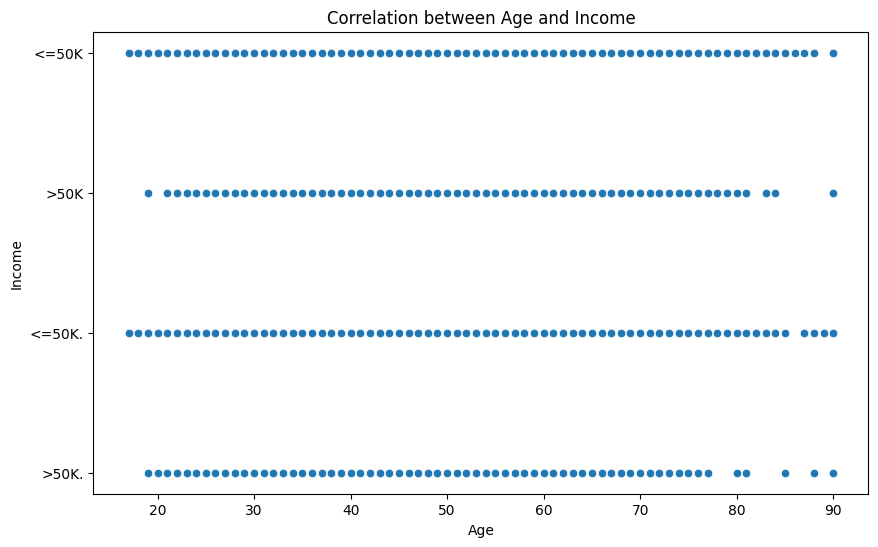

In [62]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='income', data=df)
plt.title('Correlation between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

**Correlation between Age and Income:**

**Description:** This comparison explores how age correlates with income levels. It can reveal whether there is a trend of increasing or decreasing income with age, which is important for understanding age-related income dynamics, workforce participation, and retirement planning.

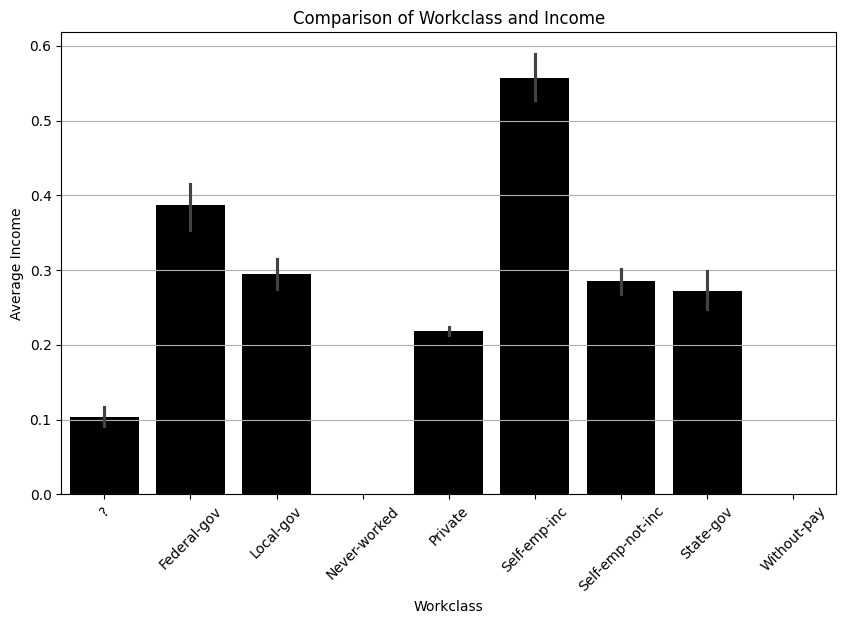

In [64]:
plt.figure(figsize=(10, 6))

sns.barplot(x='workclass', y='income_numeric', data=df, order=df['workclass'].value_counts().index.sort_values(), color='black')
plt.title('Comparison of Workclass and Income')
plt.xlabel('Workclass')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**Comparison of Workclass and Income**

**Description:** between workclass categories and income levels. It helps to understand how different types of employment, such as private sector, government, or self-employment, influence income.

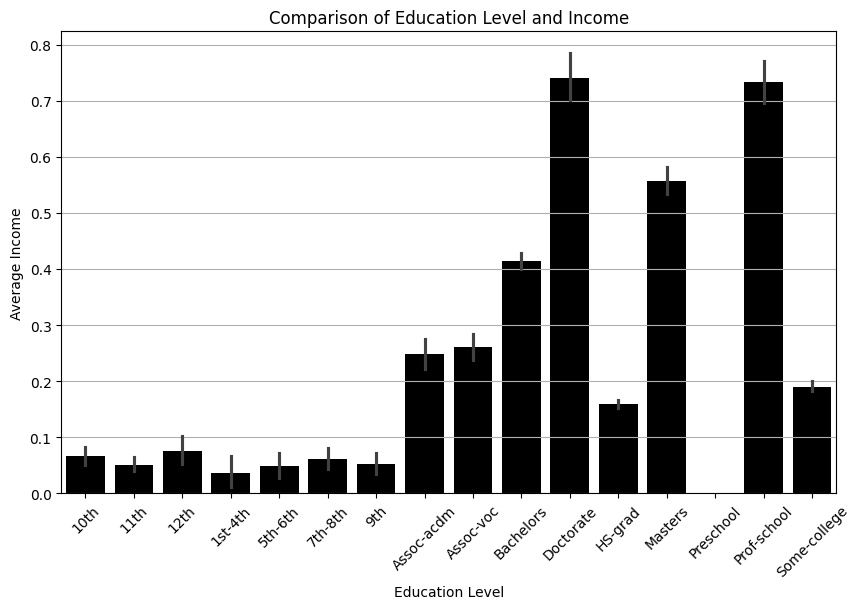

In [66]:
df['income_numeric'] = df['income'].map({'<=50K': 0, '>50K': 1})

plt.figure(figsize=(10, 6))

sns.barplot(x='education', y='income_numeric', data=df, order=df['education'].value_counts().index.sort_values(), color='black')
plt.title('Comparison of Education Level and Income')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Comparison of Education Level and Income:**

**Description:** This comparison helps to understand the relationship between education level and income. It can reveal whether higher education attainment generally leads to higher income levels, which has implications for policy-making, career choices, and socioeconomic mobility.

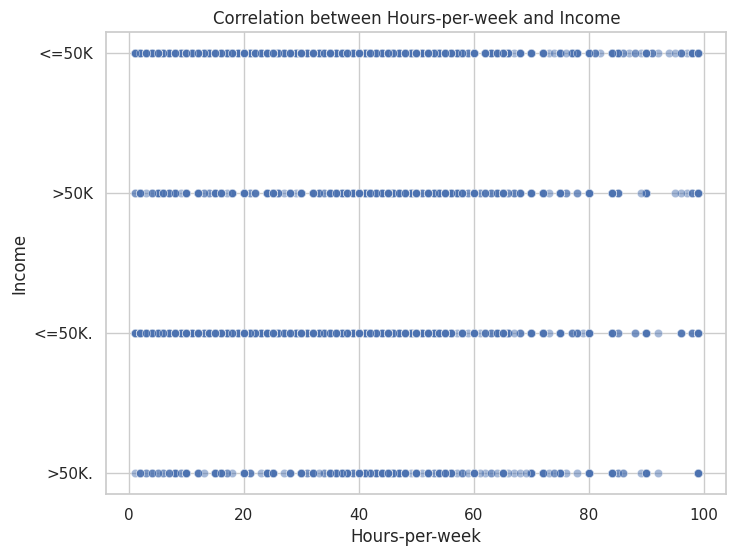

In [76]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['hours-per-week'], y=df['income'], alpha=0.5)
plt.title('Correlation between Hours-per-week and Income')
plt.xlabel('Hours-per-week')
plt.ylabel('Income')
plt.grid(True)
plt.show()

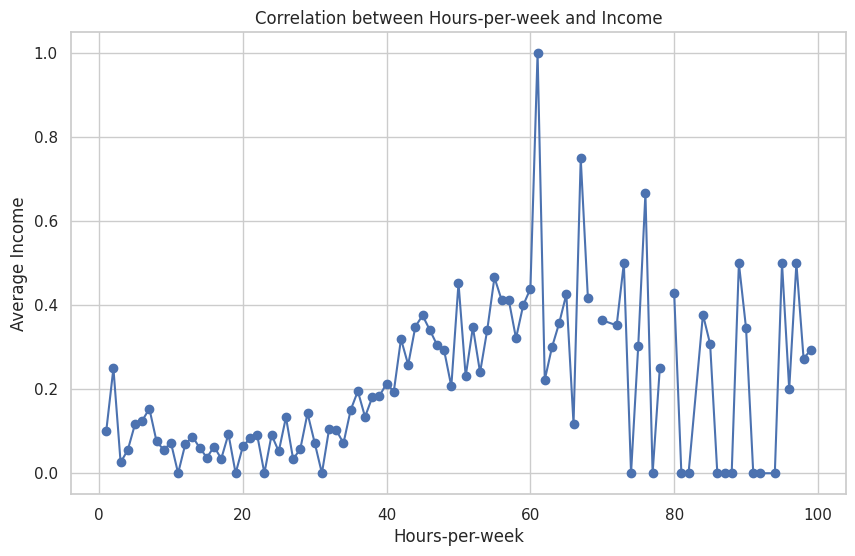

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(df.groupby('hours-per-week')['income_numeric'].mean(), marker='o', linestyle='-')
plt.title('Correlation between Hours-per-week and Income')
plt.xlabel('Hours-per-week')
plt.ylabel('Average Income')
plt.grid(True)
plt.show()

**Correlation between Hours-per-week and Income:**

**Description:** This comparison examines how the number of hours worked per week correlates with income levels. It helps to understand whether working longer hours is associated with higher income and provides insights into labor market dynamics and wage structures.

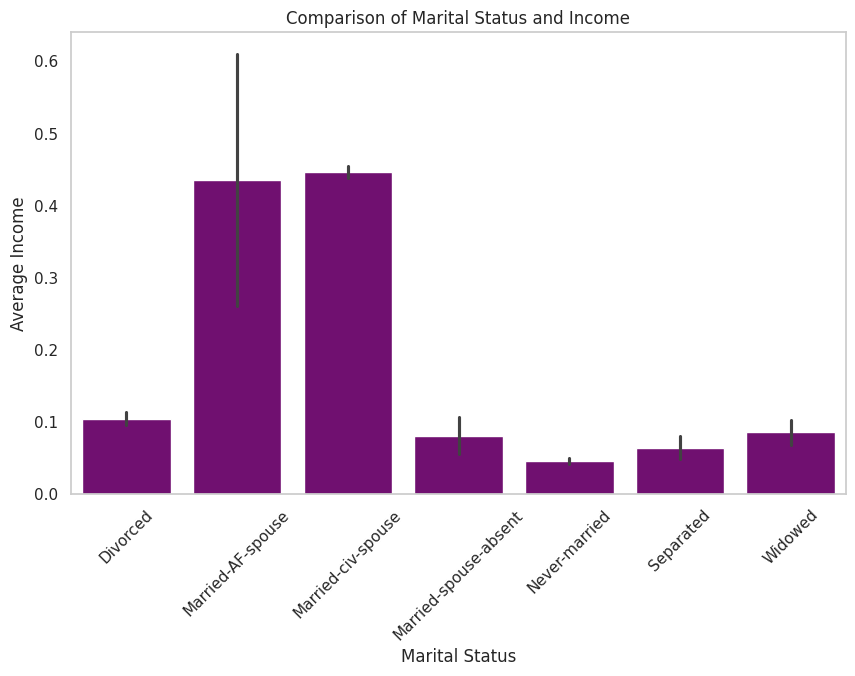

In [80]:
df['marital_numeric'] = df['marital-status'].map({'Married-civ-spouse': 1, 'Never-married': 0})

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='marital-status', y='income_numeric', data=df, order=df['marital-status'].value_counts().index.sort_values(), color='purple')
plt.title('Comparison of Marital Status and Income')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Comparison of Marital Status and Income:**


**Description:** This comparison explores how marital status correlates with income levels. It can shed light on whether married individuals tend to have higher incomes compared to unmarried individuals, and it may highlight potential socioeconomic factors influencing income disparities between marital statuses.

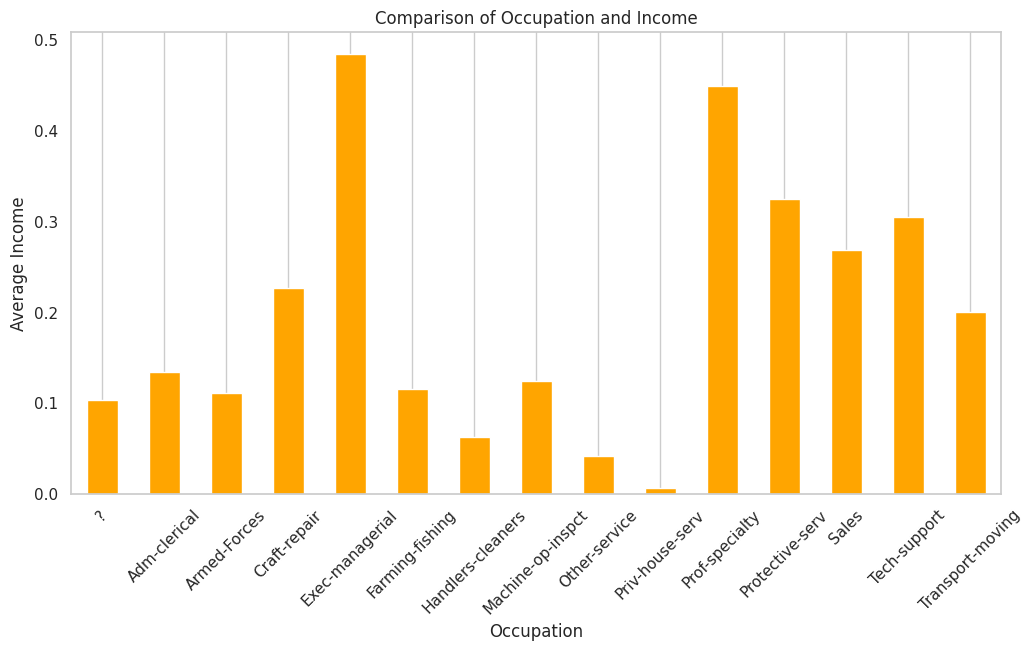

In [86]:
df['occupation_numeric'] = df['occupation'].map({'Prof-specialty': 1, 'Craft-repair': 2, 'Exec-managerial': 3,
                                                 'Adm-clerical': 4, 'Sales': 5, 'Other-service': 6,
                                                 'Machine-op-inspct': 7, 'Transport-moving': 8, 'Handlers-cleaners': 9,
                                                 'Farming-fishing': 10, 'Tech-support': 11, 'Protective-serv': 12,
                                                 'Priv-house-serv': 13, 'Armed-Forces': 14})

plt.figure(figsize=(12, 6))
occupation_order = df['occupation'].value_counts().index.sort_values()
occupation_counts = df.groupby('occupation')['income_numeric'].mean().loc[occupation_order]
occupation_counts.plot(kind='bar', color='orange')
plt.title('Comparison of Occupation and Income')
plt.xlabel('Occupation')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Comparison of Occupation and Income:**

**Description:** This comparison examines the income disparities across various occupations. It helps to identify occupations that typically offer higher salaries and those that may have lower income levels. Understanding these income differences can inform career choices, workforce development strategies, and policies aimed at reducing income inequality.

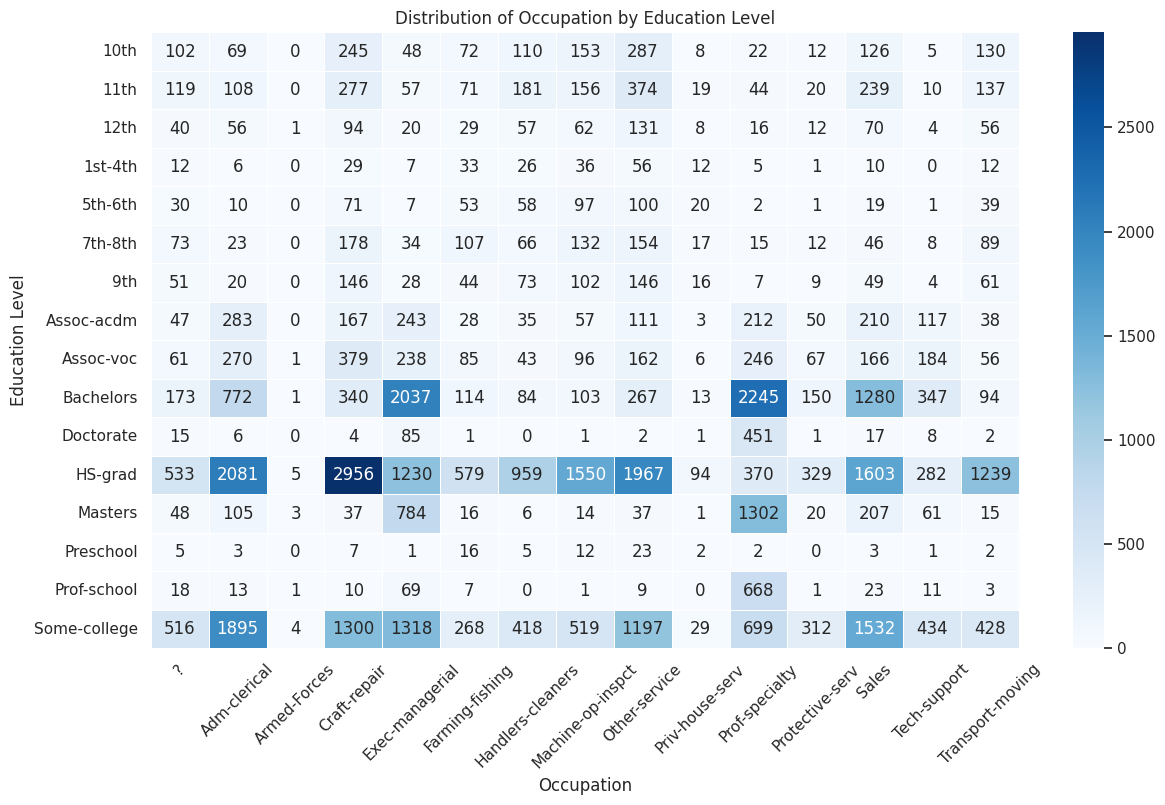

In [87]:
occupation_education_pivot = df.pivot_table(index='education', columns='occupation', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(occupation_education_pivot, cmap='Blues', annot=True, fmt='g', linewidths=.5)
plt.title('Distribution of Occupation by Education Level')
plt.xlabel('Occupation')
plt.ylabel('Education Level')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

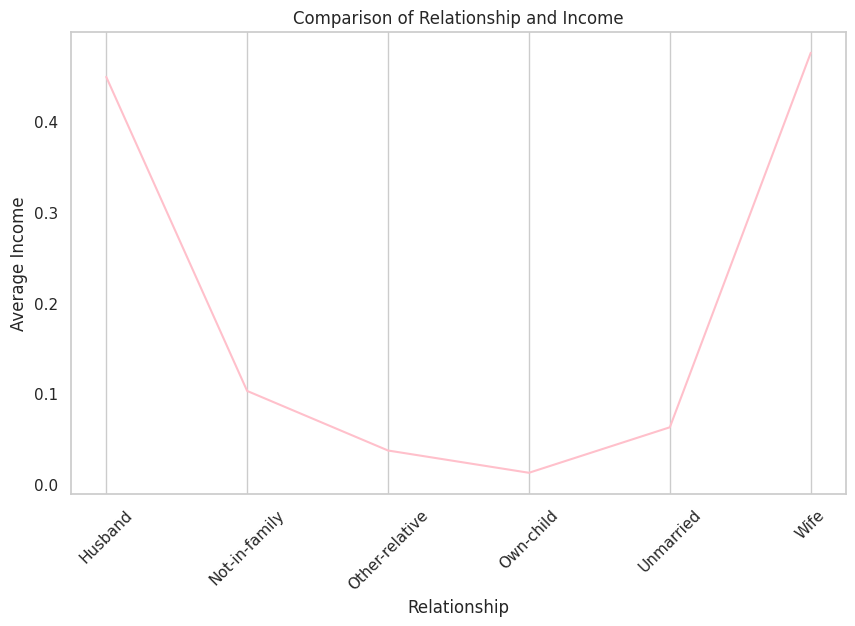

In [90]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
relationship_order = df['relationship'].value_counts().index.sort_values()
relationship_counts = df.groupby('relationship')['income_numeric'].mean().loc[relationship_order]
sns.lineplot(x=relationship_counts.index, y=relationship_counts.values, color='pink')
plt.title('Comparison of Relationship and Income')
plt.xlabel('Relationship')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Comparison o Relationship and Income**

**Description:** This comparison examines the correlation between relationship status and income levels. It helps to understand whether factors such as being married, single, or in other relationship statuses impact income, providing insights into household dynamics and financial well-being.

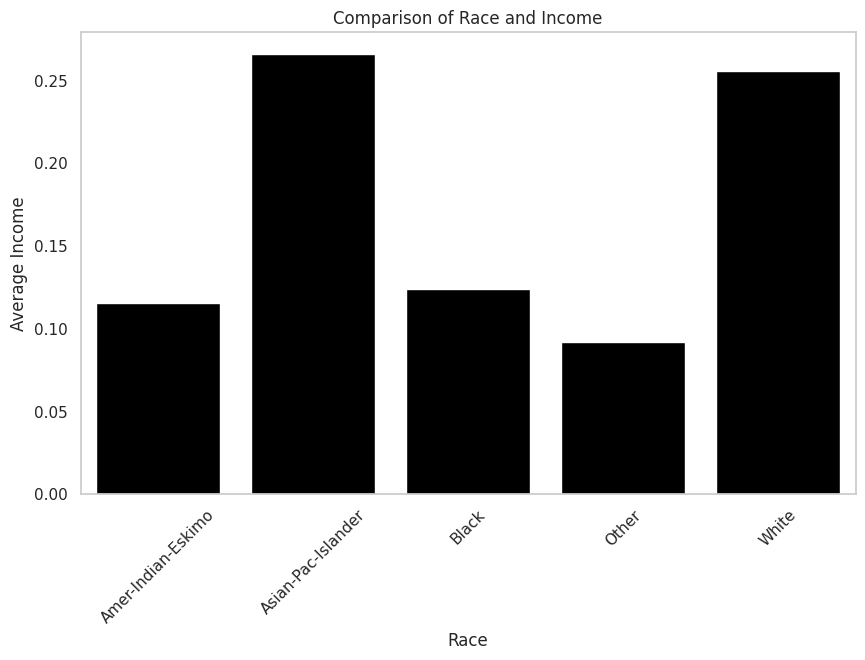

In [93]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
race_order = df['race'].value_counts().index.sort_values()
race_counts = df.groupby('race')['income_numeric'].mean().loc[race_order]
sns.barplot(x=race_counts.index, y=race_counts.values, color='black')
plt.title('Comparison of Race and Income')
plt.xlabel('Race')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Comparison of Race and Income**

**Description:** This comparison explores income disparities across different racial groups. It helps to identify whether certain racial demographics tend to have higher or lower incomes, highlighting potential disparities and informing efforts to promote equity and inclusion.

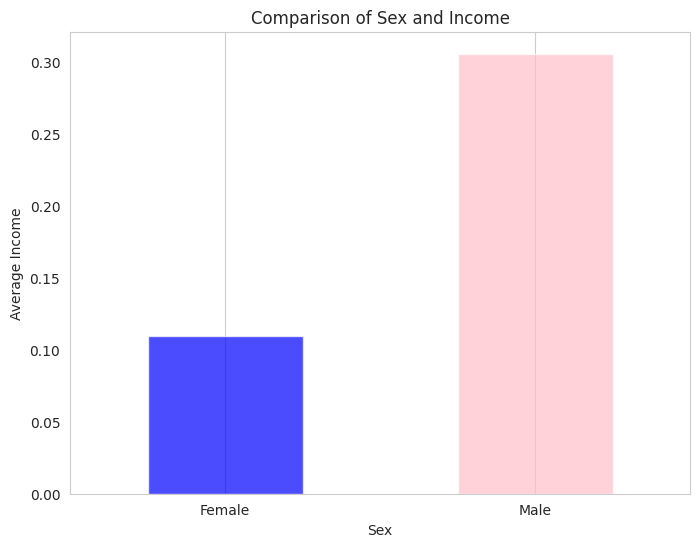

In [ ]:
plt.figure(figsize=(8, 6))
sex_counts = df.groupby('sex')['income_numeric'].mean()
sex_counts.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title('Comparison of Sex and Income')
plt.xlabel('Sex')
plt.ylabel('Average Income')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [52]:
gender_workclass_pivot = df.pivot_table(index='sex', columns='workclass', aggfunc='size', fill_value=0)

print("Employment Distribution by Gender:")
print(gender_workclass_pivot)

Employment Distribution by Gender:
workclass    ?  Federal-gov  Local-gov  Never-worked  Private  Self-emp-inc  \
sex                                                                           
Female     839          465       1282             3    11916           225   
Male       997         1004       1908             7    22682          1506   

workclass  Self-emp-not-inc  State-gov  Without-pay  
sex                                                  
Female                  665        779            8  
Male                   3271       1241           15  


<Figure size 1000x600 with 0 Axes>

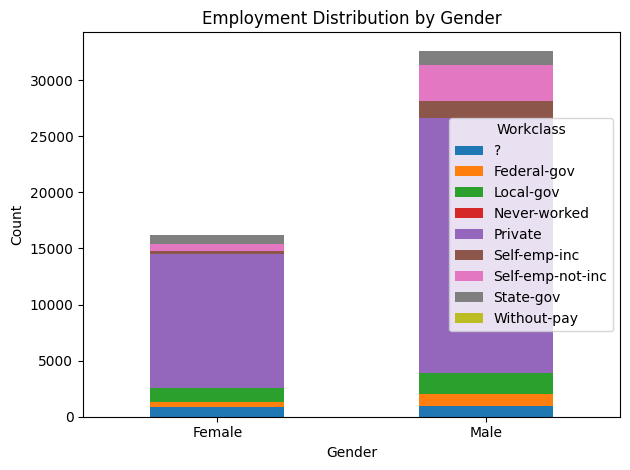

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

gender_workclass_pivot.plot(kind='bar', stacked=True)

plt.title('Employment Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.legend(title='Workclass')

plt.tight_layout()
plt.show()


In [55]:
total_employment = gender_workclass_pivot.sum(axis=1)

print("Total Employment Count for Each Gender:")
print(total_employment)


Total Employment Count for Each Gender:
sex
Female    16182
Male      32631
dtype: int64


**Comparison o Sex and Income:**

**Description:** This comparison investigates income differences between genders. It helps to understand whether there is a gender wage gap and how gender identity influences income levels, providing insights into gender equality and workplace diversity.

In addition it also examines the total employment count for each gender, revealing 16,182 females and 32,631 males. With a total difference of 16,449, it sheds light on potential income disparities between genders, offering insights into the presence of a gender wage gap and the influence of gender identity on income levels. This data contributes to discussions on gender equality and workplace diversity by highlighting the significant difference in employment numbers between males and females.

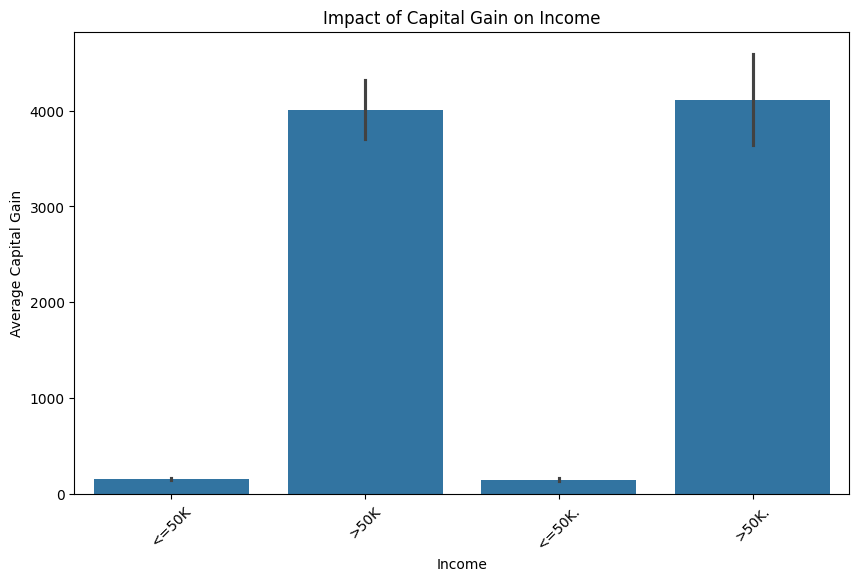

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='capital-gain', data=df)
plt.title('Impact of Capital Gain on Income')
plt.xlabel('Income')
plt.ylabel('Average Capital Gain')
plt.xticks(rotation=45)
plt.show()

**Capital Gain and Income:**

**Description:** This comparison examines the relationship between capital gains and income levels. It helps to understand how investment income impacts overall income levels and wealth accumulation, providing insights into investment strategies and financial planning.

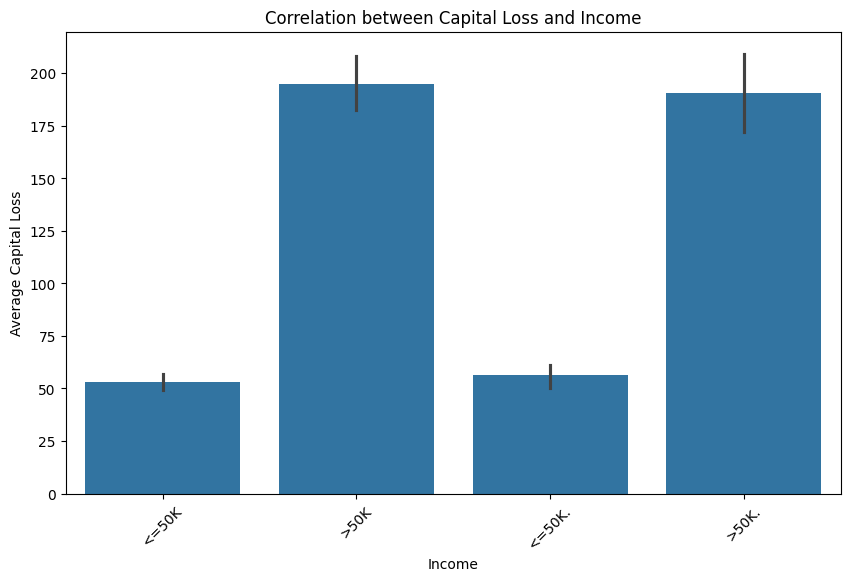

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x='income', y='capital-loss', data=df)
plt.title('Correlation between Capital Loss and Income')
plt.xlabel('Income')
plt.ylabel('Average Capital Loss')
plt.xticks(rotation=45)
plt.show()

**Capital Loss and Income:**

**Description:** This comparison explores how capital losses correlate with income levels. It helps to understand the impact of investment losses on overall income and financial stability, providing insights into risk management and investment decision-making.

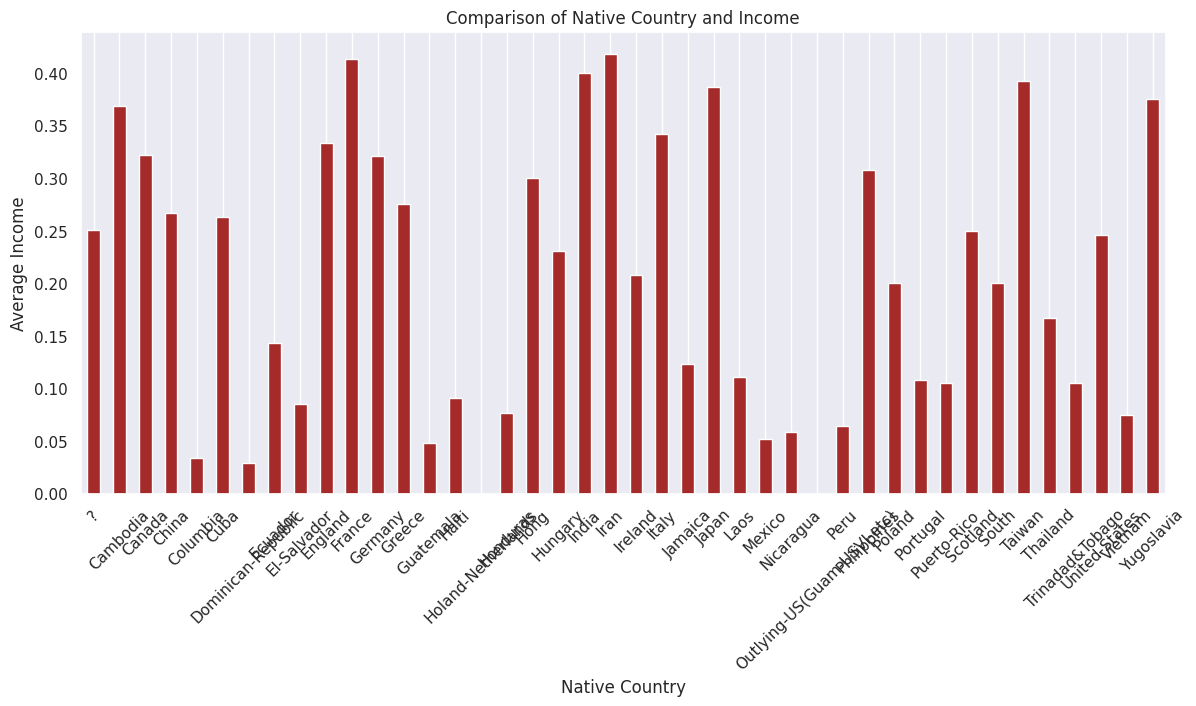

In [101]:
plt.figure(figsize=(14, 6))
country_order = df['native-country'].value_counts().index.sort_values()
country_counts = df.groupby('native-country')['income_numeric'].mean().loc[country_order]
country_counts.plot(kind='bar', color='brown')
plt.title('Comparison of Native Country and Income')
plt.xlabel('Native Country')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Comparison of Native Country and Income:**

**Description:** This comparison examines income disparities across different native countries. It helps to identify whether individuals from certain countries tend to have higher or lower incomes, highlighting potential socioeconomic factors influencing income levels.

**Conclusion**

Analyzing demographic and income data provides valuable insights into socioeconomic trends and disparities. The data suggest that education plays a significant role in determining income levels, with higher educational attainment generally leading to higher salaries. Furthermore, marital status appears to influence income, with married couples often enjoying higher combined incomes compared to single individuals. Occupation also plays a crucial role, as certain professions command higher salaries than others. Additionally, disparities between genders in terms of employment counts highlight ongoing discussions surrounding gender equality and workplace diversity. Overall, this analysis underscores the importance of addressing socioeconomic inequalities and promoting equal opportunities for all individuals in the workforce.